# 1. Exercise from course

## 1.1 Import data and libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data set
path = r'/Users/minglunchen/Desktop/12-2023 Instacart Basket Analysis'

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merged_derived_grouped.pkl'))

In [6]:
ords_prods_merge.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,orders_interval,first_order,product_id,add_to_cart_order,...,price_range_loc,busiest_day,busiest_day_2,busiest_period_of_day,max_order,loyalty_flag,avg_spending,spending_flag,median_orders_interval,frequency_flag
0,2539329,1,prior,1,2,8,NaN,True,196,1,...,Mid range product,Regularly busy,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,prior,2,3,7,15.0,False,196,1,...,Mid range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,prior,3,3,12,21.0,False,196,1,...,Mid range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,prior,4,4,7,29.0,False,196,1,...,Mid range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,prior,5,4,15,28.0,False,196,1,...,Mid range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


## 1.2 Creating Bar Charts

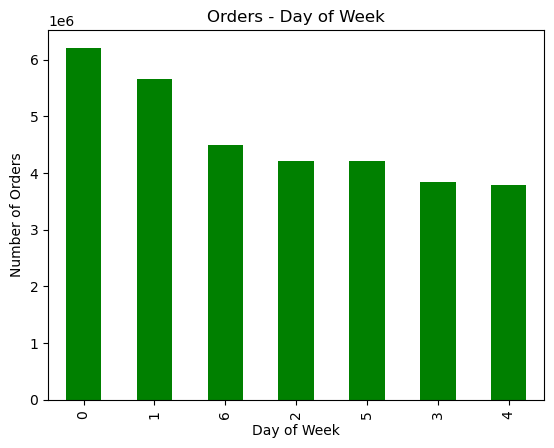

In [11]:
# Create bar charts for 'orders_day_of_week'
bar_orders_dow = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(title = 'Orders - Day of Week', xlabel = 'Day of Week', ylabel = 'Number of Orders', color = 'green')

<Axes: xlabel='orders_day_of_week'>

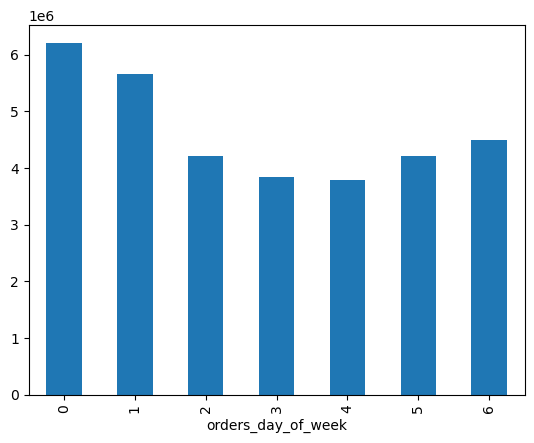

In [8]:
# sort by index rather than order and this also apply when printing frequency
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

<Axes: xlabel='orders_day_of_week'>

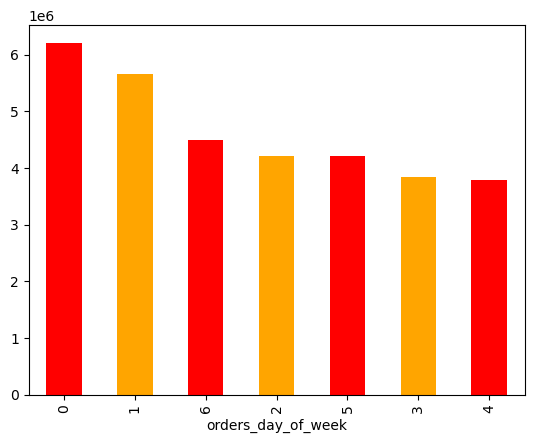

In [9]:
# change colors
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['red', 'orange'])

## 1.3 Exporting Charts

<Axes: xlabel='orders_day_of_week'>

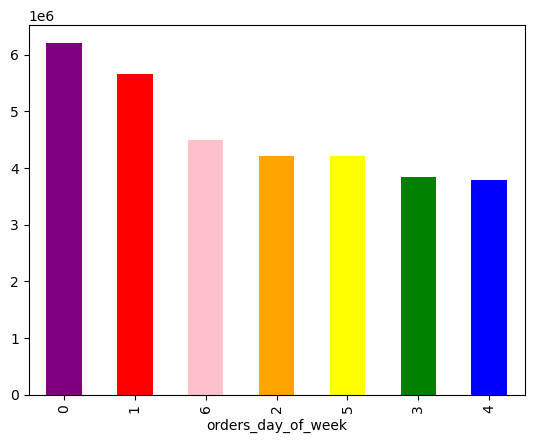

In [10]:
# save bar chart within 'bar' object and the chart can be accessed by calling bar.figure
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [12]:
# Export the chart outside of Jupyter in the form of image file
bar_orders_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## 1.4 Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

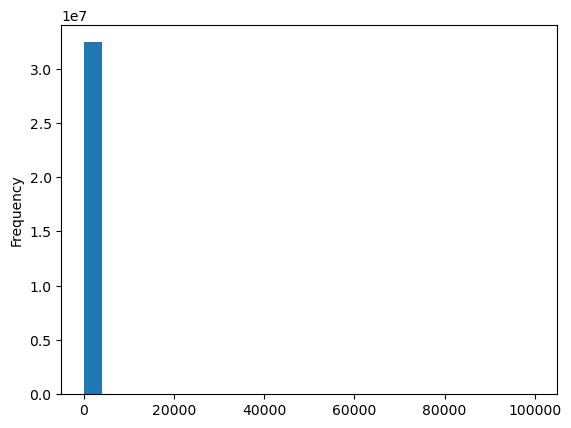

In [13]:
# Create a histogram of 'price'
ords_prods_merge['prices'].plot.hist(bins = 25)

In [14]:
# Check data integrity of 'price' column
ords_prods_merge['prices'].describe()

count    3.243421e+07
mean     1.198114e+01
std      4.954311e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

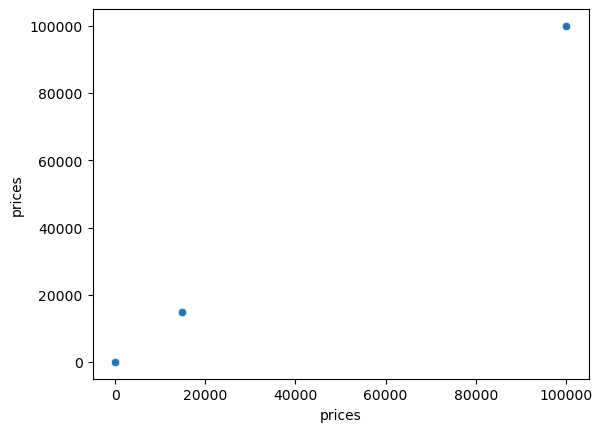

In [15]:
# Explore data via a scatterplot
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge) 

In [16]:
# Determine the outliers by setting a certain threshold
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,orders_interval,first_order,product_id,add_to_cart_order,...,price_range_loc,busiest_day,busiest_day_2,busiest_period_of_day,max_order,loyalty_flag,avg_spending,spending_flag,median_orders_interval,frequency_flag
10030345,912404,17,prior,12,2,14,5.0,False,21553,5,...,High range product,Regularly busy,Regular days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,prior,22,6,16,4.0,False,21553,3,...,High range product,Regularly busy,Regular days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,prior,2,2,21,13.0,False,21553,6,...,High range product,Regularly busy,Regular days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,prior,3,0,8,12.0,False,21553,3,...,High range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,prior,8,1,19,30.0,False,21553,9,...,High range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29193268,2249946,204099,prior,29,0,8,4.0,False,33664,1,...,High range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29193269,2363282,204099,prior,31,0,9,2.0,False,33664,1,...,High range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29193270,3181945,204395,prior,13,3,15,8.0,False,33664,25,...,High range product,Regularly busy,Slowest days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29193271,2486215,205227,prior,7,3,20,4.0,False,33664,8,...,High range product,Regularly busy,Slowest days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [17]:
# Mark them as missing (NaNs) -- this is not recommended 
ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [18]:
# check the maximum value
ords_prods_merge['prices'].max()

25.0

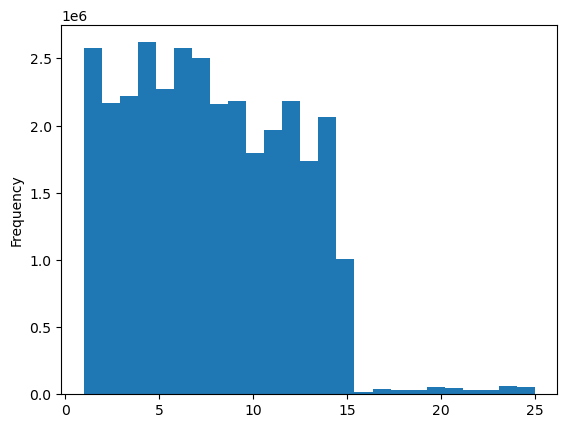

In [19]:
# Retry the histogram
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

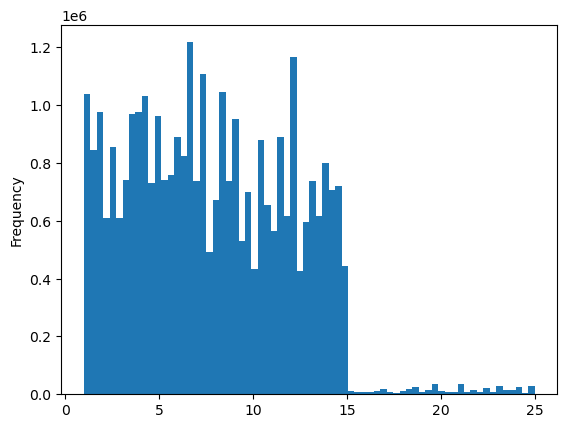

In [20]:
hist_prices = ords_prods_merge['prices'].plot.hist(bins = 70)

In [21]:
# Export histogram
hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

## 1.5 Creating Line Charts

Subset would not be representative of the entire population, to solve the problem -- Sampling!

In [22]:
# 70/30 split
## Create a list holding True/Fale values to the test np.random.rant() <= 0.7
np.random.seed(4)
dev= np.random.rand(len(ords_prods_merge)) <= 0.7

In [23]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [24]:
# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [25]:
# Check samples with length of the dataset
len(ords_prods_merge)

32434212

In [26]:
len(big) + len(small)

32434212

In [27]:
# Create a new dataframe df_2 contains 'prices' and 'orders_day_of_week'
df_2 = small[['orders_day_of_week', 'prices']]

/Users/minglunchen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/minglunchen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


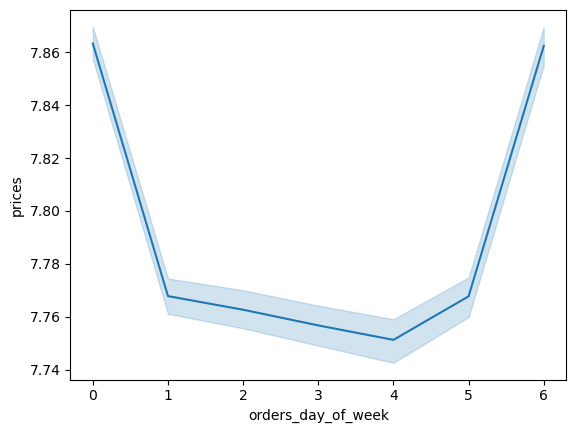

In [28]:
# Create a line chart
line_prices_dow = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [29]:
# Export line chart
line_prices_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_dow.png'))

 # 2. Task - Part 2

### Step 1: Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [6]:
# Libraries and path have been imported and created above
# Import most up-to-date project data 
ords_prods_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers.pkl'))

In [22]:
# Overview check for the data set
ords_prods_customers.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,orders_interval,first_order,product_id,add_to_cart_order,...,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,prior,1,2,8,NaN,True,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,prior,2,3,7,15.0,False,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,prior,3,3,12,21.0,False,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,prior,4,4,7,29.0,False,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,prior,5,4,15,28.0,False,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [23]:
ords_prods_customers.shape

(32434212, 35)

### Step 2: If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

See the charts in the 'Exercise from course' above.

### Step 3: You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column. 
#### In a markdown cell beneath your histogram, describe what the histogram demonstrates.

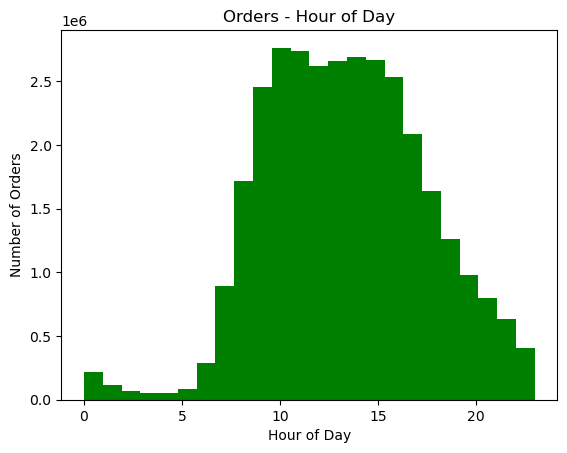

In [8]:
hist_ohod = ords_prods_customers['order_hour_of_day'].plot.hist(bins = 24, title = 'Orders - Hour of Day', xlabel = 'Hour of Day', ylabel = 'Number of Orders', color = 'green')

In [34]:
# Double check the result with the frequency counts
ords_prods_customers['order_hour_of_day'].value_counts()

order_hour_of_day
10    2764390
11    2738585
14    2691563
15    2664522
13    2663272
12    2620800
16    2537469
9     2456661
17    2089452
8     1719952
18    1637922
19    1259382
20     977017
7      891928
21     796362
22     634737
23     402612
6      290770
0      218942
1      115786
5       88057
2       69431
4       53283
3       51317
Name: count, dtype: int64

The histogram demostrates that:
1) 10 am had the most orders;
2) the peak hours were between 10 and 15.
3) the least orders were found between 2 and 5. 

In [9]:
# Export the histogram outside of Jupyter in the form of png file
hist_ohod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hod.png'))

### Step 4: The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

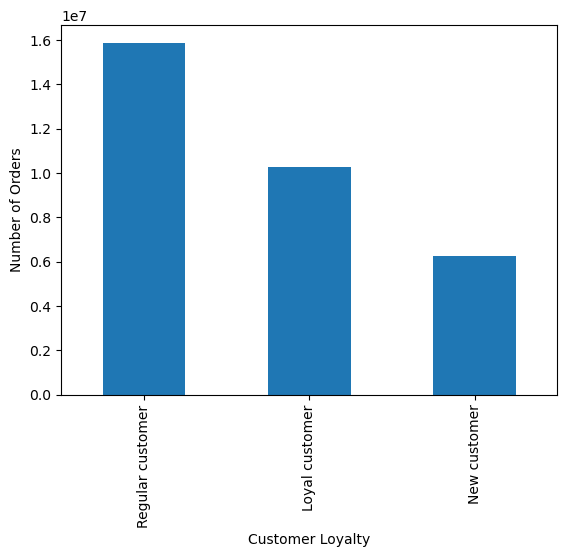

In [36]:
bar_loyalty = ords_prods_customers['loyalty_flag'].value_counts().plot.bar(xlabel = 'Customer Loyalty', ylabel = 'Number of Orders')

In [37]:
# Double check the result with the frequency counts
ords_prods_customers['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15891077
Loyal customer      10293737
New customer         6249398
Name: count, dtype: int64

In [38]:
# Export the bar chart outside of Jupyter in the form of png file
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_loyalty.png'))

### Step 5: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [39]:
# Check the maximum of 'prices'
ords_prods_customers['prices'].max()

99999.0

In [40]:
# 'prices' has been investigated in the exercise, some very large values were found in the scatterplot, .
# Determine the outliers by setting a threshold: mark prices > 20000 as missing (NaNs) -- this is principly not recommended, but I just practice in this task. 
ords_prods_customers.loc[ords_prods_customers['prices'] > 20000, 'prices'] = np.nan

In [41]:
# Re-check the maximum value of 'prices'
ords_prods_customers['prices'].max()

14900.0

In [42]:
# Create a list holding True/Fale values to the test np.random.rant() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_customers)) <= 0.7

In [43]:
# Store 70% of the sample in the dataframe big
big = ords_prods_customers[dev]

In [44]:
# Store 30% of the sample in the dataframe small
small = ords_prods_customers[~dev]

In [45]:
# Create a new dataframe containing 'prices' and 'order_hour_of_day'
df_price_ohod = small[['order_hour_of_day', 'prices']]

In [46]:
df_price_ohod.head()

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5


/Users/minglunchen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/minglunchen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


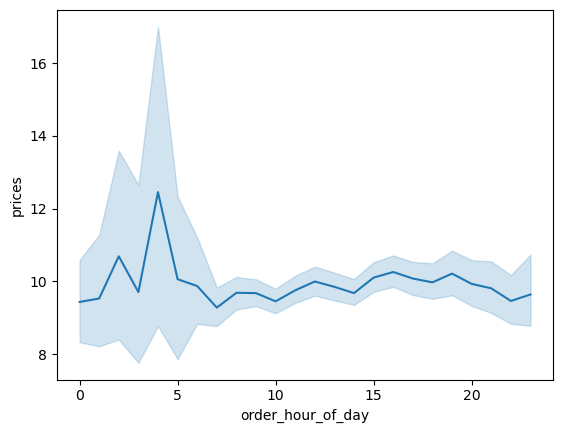

In [47]:
# Create a line chart
line_price_ohod = sns.lineplot(data = df_price_ohod, x = 'order_hour_of_day', y = 'prices')

Based on the condition (mark price > 20000 as missing values), the prices indeed varied on the hour of the day:
1) the highest prices appeared at 4am;
2) the prices from 8 to 23 stayed relatively stable.

In [49]:
# Export line chart in the form of png file
line_price_ohod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_ohod.png'))

### Step 6: Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
#### In a markdown cell beneath your line chart, describe what the line chart shows.

In [50]:
# Create a new dataframe dataframe containing 'age' and 'n_dependants'
df_age_depends = small[['age', 'n_dependants']]

In [51]:
df_age_depends.head()

,age,n_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


/Users/minglunchen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/minglunchen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


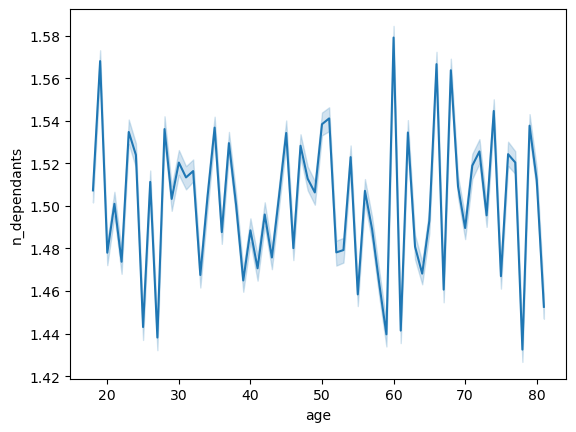

In [52]:
# Create a line chart
line_age_depends = sns.lineplot(data = df_age_depends, x = 'age', y = 'n_dependants')

The line chart demonstrates that:
1) the number of dependants varies between 1.42 and 1.60;
2) the age of customers varies between 18 and 81;
3) the number of dependants fluctuates - it indicateds no significant relationship between age and number of dependants.

In [53]:
# Export line chart in the form of png
line_age_depends.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_depends.png'))

### Step 7: You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
#### In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

Text(0.5, 1.0, 'Relationship between Age and Income')

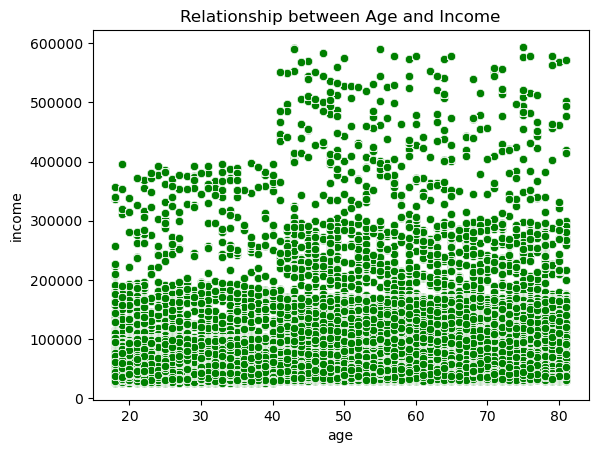

In [28]:
scatter_age_income = sns.scatterplot(x = 'age', y = 'income', data = ords_prods_customers, color = 'green') 
plt.title('Relationship between Age and Income')

The scatterplot demonstrates:
1) there is a 'watershed'at the age of 40: where the customers over 40 have significant higher spending power;
2) most customers between 18 and 40 have the income up to 200000; 
3) most customers over 40 have the income up to 300000.

In [29]:
# Export scatterplot in the form of png
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))